In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [55]:
#importing the dataset

df=pd.read_csv("/Users/shwethasp/Downloads/test.csv")


In [56]:
df.shape

(59909, 7)

In [57]:
# Check the DataFrame structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB
None


In [58]:
# Filter the DataFrame for speakers with less than 3 words and where deleted is False
filtered_df = df[(df['speaker'].str.split().str.len() < 3) ]

# Sort the filtered DataFrame by the 'speaker' column in ascending order if desired
filtered_df = filtered_df.sort_values(by='speaker').reset_index(drop=True)

# Display the new filtered DataFrame
print(filtered_df)



          id  season  episode  scene  \
0      27451       5       15     19   
1      27448       5       15     19   
2      27453       5       15     19   
3      27445       5       15     19   
4      27442       5       15     19   
...      ...     ...      ...    ...   
59485  57599       9       17     24   
59486  34268       6       11     22   
59487  44567       7       21     28   
59488  18239       4        3     19   
59489   3308       2        4     36   

                                               line_text speaker  deleted  
0                        No, what are you talking about?    A.J.    False  
1                                             Excuse me?    A.J.    False  
2                                   Does what feel good?    A.J.    False  
3                              It's pretty serious, yes.    A.J.    False  
4             Yeah. Why, are you interested? [all laugh]    A.J.    False  
...                                                  ...     ..

In [62]:
df=filtered_df

In [66]:
# Get unique character names and sort them in ascending order
# Convert the 'speaker' column to lowercase
df['speaker'] = df['speaker'].str.lower()

# Convert the 'speaker' column to lowercase and remove special characters except apostrophes
df['speaker'] = df['speaker'].str.lower().str.replace(r"[^a-zA-Z0-9\s']", '', regex=True)



df['speaker'] = df['speaker'].apply(lambda x: x.replace(' ', '') if any(char.isdigit() for char in x) else x)
unique_sorted_characters = sorted(df['speaker'].unique())

# Display the sorted unique character names
print(unique_sorted_characters)


['aaron rodgers', 'abby', 'abe', 'actor', 'actress', 'aj', 'alan', 'albiny', 'alex', 'alice', 'all', 'all girls', 'alonzo', 'alyssa', 'amanda', 'amy', 'andy', 'andyoscar', 'andypam', 'andystanley', 'angel', 'angela', 'angelapam', 'angels', 'anglea', 'announcer', 'another guy', 'archivist', 'artist', 'astrid', 'athlead coworker', 'athlead employee', 'attendant', 'audience', 'aunt shirley', 'ballerinas', 'bar manager', 'barbara', 'barbara allen', 'bartender', 'bass player', 'ben', 'ben franklin', 'bert', 'beth', 'bill', 'bill cress', 'bill hader', 'billy', 'billy merchant', "billy's girlfriend", 'blogger', 'blogger2', 'blonde', 'blood girl', 'boat guy', 'bob', 'bob vance', "bob's secretary", 'bookstore employee', 'boom box', 'both', 'bouncer', 'brad', 'brandon', 'brenda', 'brian', 'broccoli rob', 'bruce', 'bus driver', 'business partner', 'businessman1', 'businessman2', 'businessman3', 'buyer', 'calvin', 'camera crew', 'cameraman', 'cameron', 'captain jack', 'carla', 'carla fern', 'carol

In [74]:
unique_sorted_characters = sorted(df['cleaned_speaker'].unique())
unique_sorted_characters

['aaron rodgers',
 'abby',
 'abe',
 'actor',
 'actress',
 'aj',
 'alan',
 'albiny',
 'alex',
 'alice',
 'all',
 'all girls',
 'alonzo',
 'alyssa',
 'amanda',
 'amy',
 'andy',
 'andyoscar',
 'andypam',
 'andystanley',
 'angel',
 'angela',
 'angelapam',
 'angels',
 'anglea',
 'announcer',
 'another guy',
 'archivist',
 'artist',
 'astrid',
 'athlead coworker',
 'athlead employee',
 'attendant',
 'audience',
 'aunt shirley',
 'ballerinas',
 'bar manager',
 'barbara',
 'barbara allen',
 'bartender',
 'bass player',
 'ben',
 'ben franklin',
 'bert',
 'beth',
 'bill',
 'bill cress',
 'bill hader',
 'billy',
 'billy merchant',
 "billy's girlfriend",
 'blogger',
 'blogger2',
 'blonde',
 'blood girl',
 'boat guy',
 'bob',
 'bob vance',
 "bob's secretary",
 'bookstore employee',
 'boom box',
 'both',
 'bouncer',
 'brad',
 'brandon',
 'brenda',
 'brian',
 'broccoli rob',
 'bruce',
 'bus driver',
 'business partner',
 'businessman1',
 'businessman2',
 'businessman3',
 'buyer',
 'calvin',
 'camera 

In [76]:
# Split the 'speaker' column into two new columns: 'first_name' and 'second_name'
df[['first_name', 'second_name']] = df['cleaned_speaker'].str.split(' ', n=1, expand=True)

# Display the updated DataFrame
print(df)

          id  season  episode  scene  \
0      27451       5       15     19   
1      27448       5       15     19   
2      27453       5       15     19   
3      27445       5       15     19   
4      27442       5       15     19   
...      ...     ...      ...    ...   
59485  57599       9       17     24   
59486  34268       6       11     22   
59487  44567       7       21     28   
59488  18239       4        3     19   
59489   3308       2        4     36   

                                               line_text speaker  deleted  \
0                        No, what are you talking about?      aj    False   
1                                             Excuse me?      aj    False   
2                                   Does what feel good?      aj    False   
3                              It's pretty serious, yes.      aj    False   
4             Yeah. Why, are you interested? [all laugh]      aj    False   
...                                                  ... 

In [81]:
# Split the 'speaker' column into two new columns: 'first_name' and 'second_name'
df[['first_name', 'second_name']] = df['speaker'].str.split(' ', n=1, expand=True)

# Create lists from the columns
first_names = df['first_name'].tolist()
second_names = df['second_name'].tolist()

# Check if any second names are present in the corresponding first names
for i in range(len(second_names)):
    # Ensure both names are not None and are strings
    first_name = first_names[i] if isinstance(first_names[i], str) else ''
    second_name = second_names[i] if isinstance(second_names[i], str) else ''
    
    if second_name and second_name in first_name:
        second_names[i] = ''  # Set the second name to empty if it appears in the first name

# Update the DataFrame with the modified second names
df['second_name'] = second_names

# Combine first_name and second_name into a new column called full_name
df['full_name'] = df['first_name'] + ' ' + df['second_name'].replace('', pd.NA)  # Replace empty second names with NaN

# Get unique full names and sort them in ascending order
unique_full_names = df['full_name'].dropna().unique()
unique_full_names_sorted = sorted(unique_full_names)

# Display the unique full names in ascending order
print("Unique full names in ascending order:")
for name in unique_full_names_sorted:
    print(name)

Unique full names in ascending order:
aaron rodgers
all girls
another guy
athlead coworker
athlead employee
aunt shirley
bar manager
barbara allen
bass player
ben franklin
bill cress
bill hader
billy merchant
billy's girlfriend
blood girl
boat guy
bob vance
bob's secretary
bookstore employee
boom box
broccoli rob
bus driver
business partner
camera crew
captain jack
carla fern
carol stills
casey dean
chad lite
checkin guy
chili's employee
christian slater
church congregation
clay aiken
cleaning lady
college student
concierge marie
cookie monster
cousin mose
cpr trainer
dacvid walalce
dacvid wallace
dan gore
dance teacher
darryl's sister
david brent
david wallace
david wallcve
delivery boy
delivery man
delivery woman
deposition reporter
diane kelly
donna muraski
elderly woman
emergency operator
entire office
everyone watching
fake jim
fake stanley
female applicant
female intern
female shareholder
female worker
financial guy
fourth shareholder
fred henry
german minister
graphics guy
group

AttributeError: 'float' object has no attribute 'split'

In [101]:
#Question - 1

from wordcloud import WordCloud

unique_names = df['full_name'].unique()

# Count of unique characters
unique_names_count = len(unique_names)

# Display the count and names
print(f"There are {unique_names_count} unique characters.")
print("Their names are:")
for name in unique_names:
    print(name)

# Create a word cloud from the unique names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_names))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title("Word Cloud of Character Names")
plt.show()

There are 197 unique characters.
Their names are:
nan
aaron rodgers
all girls
another guy
athlead coworker
athlead employee
aunt shirley
bar manager
barbara allen
bass player
ben franklin
bill cress
bill hader
billy merchant
billy's girlfriend
blood girl
boat guy
bob vance
bob's secretary
bookstore employee
boom box
broccoli rob
bus driver
business partner
cpr trainer
camera crew
captain jack
carla fern
carol stills
casey dean
chad lite
checkin guy
chili's employee
christian slater
church congregation
clay aiken
cleaning lady
college student
concierge marie
cookie monster
cousin mose
dacvid walalce
dacvid wallace
dan gore
dance teacher
darryl's sister
david brent
david wallace
david wallcve
delivery boy
delivery woman
delivery man
deposition reporter
diane kelly
donna muraski
elderly woman
emergency operator
entire office
everyone watching
fake jim
fake stanley
female applicant
female intern
female shareholder
female worker
financial guy
fourth shareholder
fred henry
german minister
gr

TypeError: sequence item 0: expected str instance, float found

In [94]:
#Question - 2

#For each character, find out who has the most lines across all episodes


# Filter the DataFrame to include only rows where 'deleted' is False
filtered_df = df[df['deleted'] == False]

# Group by full_name and count lines
line_counts = filtered_df.groupby('full_name').size().reset_index(name='line_count')

# Sort the counts in descending order
line_counts_sorted = line_counts.sort_values(by='line_count', ascending=False)

# Display the total lines for each character
print("Total lines for each character:")
for index, row in line_counts_sorted.iterrows():
    print(f"{row['full_name']}: {row['line_count']} lines")

Total lines for each character:
david wallace: 108 lines
todd packer: 66 lines
mr brown: 36 lines
captain jack: 33 lines
pam's mom: 29 lines
senator lipton: 28 lines
ben franklin: 24 lines
pizza guy: 22 lines
bar manager: 22 lines
prince grandfather: 19 lines
bob vance: 19 lines
diane kelly: 18 lines
billy merchant: 17 lines
blood girl: 17 lines
ryan howard: 17 lines
robert california: 15 lines
improv teacher: 15 lines
sweeney todd: 14 lines
hotel employee: 13 lines
second cindy: 13 lines
boat guy: 12 lines
financial guy: 11 lines
broccoli rob: 11 lines
mr ramish: 11 lines
robert dunder: 11 lines
business partner: 10 lines
graphics guy: 10 lines
athlead employee: 10 lines
chad lite: 9 lines
hospital employee: 8 lines
tattoo artist: 8 lines
mr schofield: 7 lines
phone salesman: 7 lines
checkin guy: 7 lines
uncle al: 7 lines
video michael: 7 lines
larry myers: 6 lines
fake jim: 6 lines
walter jr: 6 lines
keena gifford: 6 lines
phil maguire: 5 lines
party photographer: 5 lines
delivery ma

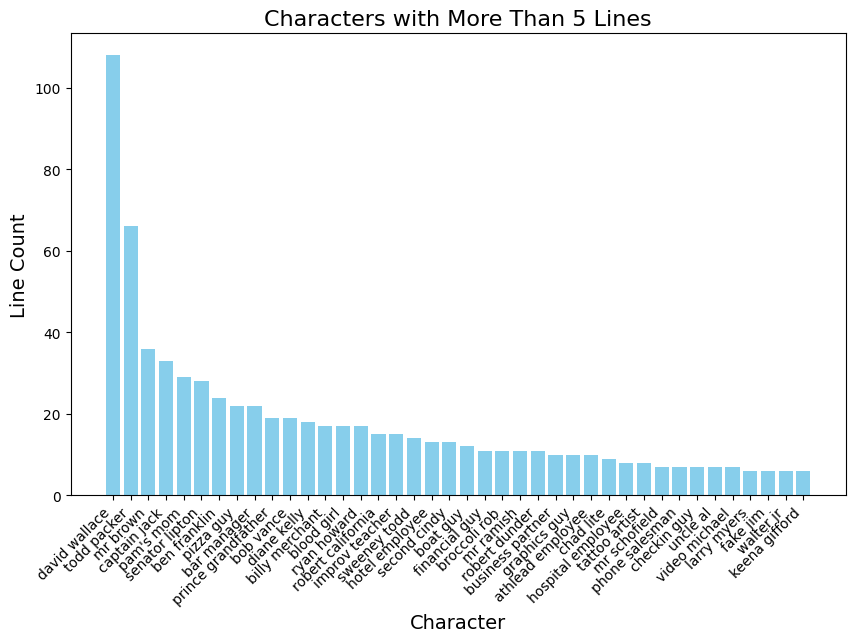

In [105]:
import matplotlib.pyplot as plt

# Filter characters with more than 20 lines
line_counts_filtered = line_counts_sorted[line_counts_sorted['line_count'] > 5]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(line_counts_filtered['full_name'], line_counts_filtered['line_count'], color='skyblue')

# Adding titles and labels
plt.title('Characters with More Than 5 Lines', fontsize=16)
plt.xlabel('Character', fontsize=14)
plt.ylabel('Line Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate each bar with the line count value
for bar in bars:
    yval = bar.get_height()


/var/folders/lt/l_mr3qz13tzgsb2s9xwqjy4h0000gn/T/ipykernel_22939/1449710707.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lt/l_mr3qz13tzgsb2s9xwqjy4h0000gn/T/ipykernel_22939/1449710707.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




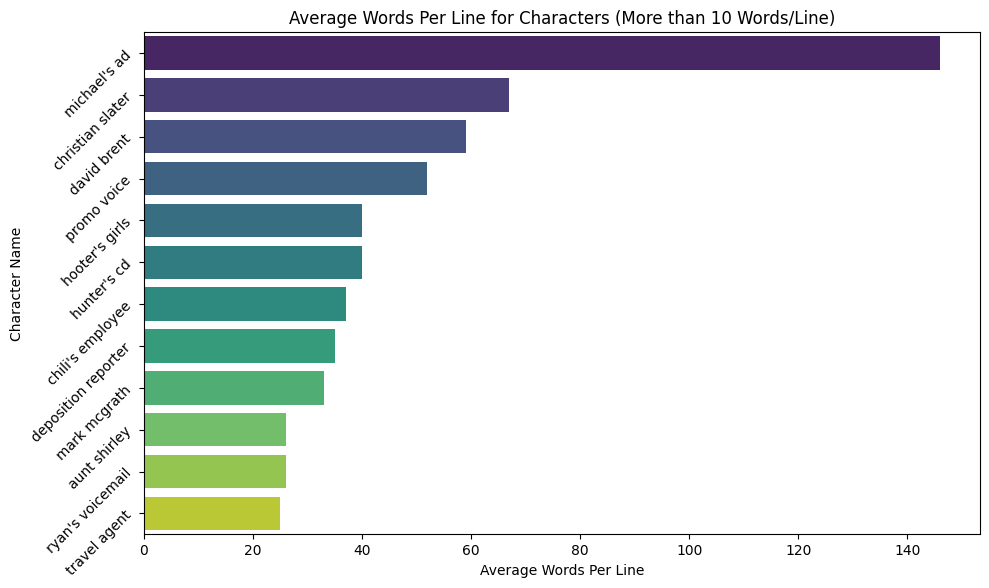

In [150]:
#Question - 3
# Calculate average words per line for each character
# Filter the DataFrame to include only rows where 'deleted' is False
filtered_df = df[df['deleted'] == False]

# Calculate word count for each line
filtered_df['word_count'] = filtered_df['line_text'].apply(lambda x: len(x.split()))

# Group by full_name and calculate the average words per line
avg_words_per_line_per_character = filtered_df.groupby('full_name')['word_count'].mean().reset_index()

# Rename the columns for clarity
avg_words_per_line_per_character.columns = ['full_name', 'avg_words_per_line']

# Convert average words per line to integers
avg_words_per_line_per_character['avg_words_per_line'] = avg_words_per_line_per_character['avg_words_per_line'].astype(int)

# Filter for average words per line greater than 10
avg_words_per_line_filtered = avg_words_per_line_per_character[avg_words_per_line_per_character['avg_words_per_line'] > 20]

# Sort the results in descending order
avg_words_per_line_sorted = avg_words_per_line_filtered.sort_values(by='avg_words_per_line', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_words_per_line', y='full_name', data=avg_words_per_line_sorted, palette='viridis')
plt.title('Average Words Per Line for Characters (More than 10 Words/Line)')
plt.xlabel('Average Words Per Line')
plt.ylabel('Character Name')
plt.xlim(left=0)  # Set the left limit of the x-axis to 0

# Rotate y-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [141]:
#Question - 4
# What is the most common word per character

from collections import Counter
import pandas as pd

# Define the words to exclude from the count
exclude_words = {'the', 'you', 'is', 'was', 'and', 'I', 'uh', 'oh'}

# Filter the DataFrame to include only rows where 'deleted' is False
filtered_df = df[df['deleted'] == False]

# Function to find the most common word in a list of lines, excluding certain words
def most_common_word(lines):
    # Join all lines into a single string and split into words
    words = ' '.join(lines).split()
    # Filter out the excluded words
    filtered_words = [word for word in words if word.lower() not in exclude_words]
    # Count the occurrences of each word
    word_counts = Counter(filtered_words)
    # Find the most common word and its count
    most_common = word_counts.most_common(1)
    return most_common[0] if most_common else (None, 0)  # Return (word, count) or (None, 0) if no words

# Group by full_name and aggregate to find the most common word
most_common_words_per_character = (
    filtered_df.groupby('full_name')['line_text']
    .agg(list)  # Aggregate lines into lists
    .apply(most_common_word)  # Apply the function to find the most common word
    .reset_index()
)

# Rename the columns for clarity
most_common_words_per_character.columns = ['full_name', 'most_common_word_and_count']

# Split the tuple into separate columns
most_common_words_per_character[['most_common_word', 'count']] = most_common_words_per_character['most_common_word_and_count'].apply(pd.Series)

# Drop the temporary column
most_common_words_per_character.drop(columns=['most_common_word_and_count'], inplace=True)

# Sort the results in descending order by count
most_common_words_per_character_sorted = most_common_words_per_character.sort_values(by='count', ascending=False)

# Display the result
print("Most Common Word per Character (excluding specified words, sorted by count, descending):")
for index, row in most_common_words_per_character_sorted.iterrows():
    print(f"{row['full_name']}: '{row['most_common_word']}' (Count: {row['count']})")


Most Common Word per Character (excluding specified words, sorted by count, descending):
david wallace: 'to' (Count: 49)
todd packer: 'I' (Count: 40)
captain jack: 'I' (Count: 17)
mr brown: 'to' (Count: 17)
broccoli rob: 'I' (Count: 12)
ben franklin: 'I' (Count: 8)
diane kelly: 'a' (Count: 8)
pam's mom: 'Oh,' (Count: 8)
deposition reporter: 'to' (Count: 7)
robert california: 'I' (Count: 6)
senator lipton: 'a' (Count: 6)
bar manager: 'a' (Count: 6)
hotel employee: 'I' (Count: 6)
ryan howard: 'I' (Count: 6)
walt jr: 'I' (Count: 6)
improv teacher: 'Ok,' (Count: 5)
michael's ad: 'a' (Count: 5)
hunter's cd: 'right,' (Count: 5)
phone salesman: 'I' (Count: 5)
pizza guy: 'not' (Count: 5)
mark mcgrath: 'to' (Count: 5)
prince grandfather: 'a' (Count: 5)
billy merchant: 'a' (Count: 5)
athlead employee: 'to' (Count: 5)
second cindy: 'I' (Count: 5)
robert dunder: 'I,' (Count: 5)
boat guy: 'I' (Count: 5)
blood girl: 'I' (Count: 5)
business partner: '[on' (Count: 4)
david brent: 'a' (Count: 4)
mexica

In [128]:
#Question - 5

#Number of episodes where the character does not have a line, for each character

# Step 1: Get all unique full names
full_names = df['full_name'].unique()

# Step 2: Initialize a dictionary to store counts
episodes_without_lines = {name: 0 for name in full_names}

# Step 3: Get all unique episodes (combining season and episode for uniqueness)
unique_episodes = df[['season', 'episode']].drop_duplicates()

# Step 4: Count episodes without lines for each full_name
for index, row in unique_episodes.iterrows():
    season = row['season']
    episode = row['episode']
    
    # Get full names who spoke in this season and episode
    full_names_in_episode = df[(df['season'] == season) & (df['episode'] == episode)]['full_name'].unique()
    
    for name in full_names:
        if name not in full_names_in_episode:
            episodes_without_lines[name] += 1

# Convert the result to a DataFrame for better visualization
episodes_without_lines_df = pd.DataFrame(list(episodes_without_lines.items()), columns=['full_name', 'episodes_without_lines'])

# Sort the DataFrame by number of episodes in descending order
episodes_without_lines_df = episodes_without_lines_df.sort_values(by='episodes_without_lines', ascending=False)

# Display the results
print(episodes_without_lines_df)

           full_name  episodes_without_lines
0                NaN                     186
134  party announcer                     185
122    officer foley                     185
124          old man                     185
126      older woman                     185
..               ...                     ...
165   senator lipton                     183
189    warehouse guy                     183
17         bob vance                     177
179      todd packer                     175
47     david wallace                     170

[197 rows x 2 columns]


/var/folders/lt/l_mr3qz13tzgsb2s9xwqjy4h0000gn/T/ipykernel_22939/45665227.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




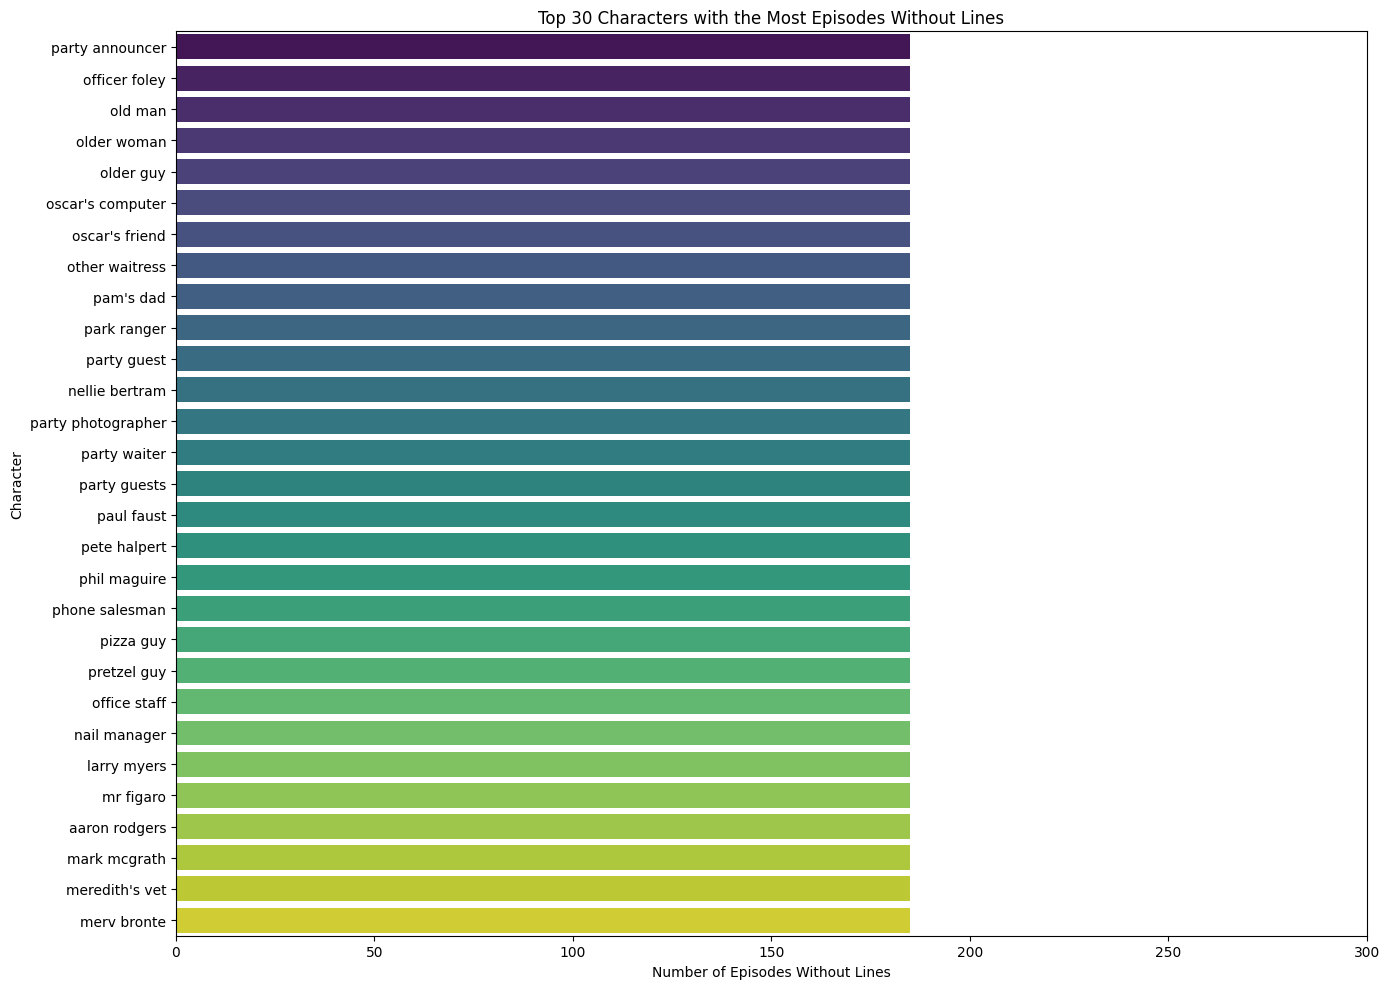

In [134]:
# Step 1: Get all unique full names
full_names = df['full_name'].unique()

# Step 2: Initialize a dictionary to store counts
episodes_without_lines = {name: 0 for name in full_names}

# Step 3: Get all unique episodes (combining season and episode for uniqueness)
unique_episodes = df[['season', 'episode']].drop_duplicates()

# Step 4: Count episodes without lines for each full_name
for index, row in unique_episodes.iterrows():
    season = row['season']
    episode = row['episode']
    
    # Get full names who spoke in this season and episode
    full_names_in_episode = df[(df['season'] == season) & (df['episode'] == episode)]['full_name'].unique()
    
    for name in full_names:
        if name not in full_names_in_episode:
            episodes_without_lines[name] += 1

# Convert the result to a DataFrame for better visualization
episodes_without_lines_df = pd.DataFrame(list(episodes_without_lines.items()), columns=['full_name', 'episodes_without_lines'])

# Remove NaN values (if any) and filter for top values
episodes_without_lines_df = episodes_without_lines_df[episodes_without_lines_df['episodes_without_lines'].notna()]
top_values_df = episodes_without_lines_df.sort_values(by='episodes_without_lines', ascending=False).head(30)  # Top 30

# Visualization - Horizontal Bar Chart
plt.figure(figsize=(14, 10))  # Adjust figure size for better visibility
sns.barplot(data=top_values_df, y='full_name', x='episodes_without_lines', palette='viridis')
plt.title('Top 30 Characters with the Most Episodes Without Lines')
plt.ylabel('Character')
plt.xlabel('Number of Episodes Without Lines')
plt.xlim(0, 300)  # Set the x-axis limit to 300
plt.tight_layout()
plt.show()

In [139]:
#Question - 7 
#The average percent of lines each character contributed each episode per season.# Step 1: Remove rows where line_text is None
# Step 1: Remove rows where line_text is None
df = df.dropna(subset=['line_text'])

# Step 2: Count total lines per episode
total_lines_per_episode = df.groupby(['season', 'episode']).size().reset_index(name='total_lines')

# Step 3: Count lines per character per episode
lines_per_character = df.groupby(['season', 'episode', 'full_name']).size().reset_index(name='character_lines')

# Step 4: Merge the total lines with character lines
merged = pd.merge(lines_per_character, total_lines_per_episode, on=['season', 'episode'])

# Step 5: Calculate the percentage of lines contributed by each character
merged['percent_contribution'] = (merged['character_lines'] / merged['total_lines']) * 100

# Step 6: Calculate the average percentage contribution by character and season
average_contribution = merged.groupby(['season', 'full_name'])['percent_contribution'].mean().reset_index()

# Step 7: Remove decimals by converting to integers
average_contribution['percent_contribution'] = average_contribution['percent_contribution'].astype(int)

# Step 8: Create a pivot table for display
pivot_table = average_contribution.pivot(index='full_name', columns='season', values='percent_contribution').fillna(0)

# Step 9: Sort the pivot table by the first season in descending order
pivot_table_sorted = pivot_table.sort_values(by=pivot_table.columns[0], ascending=False)

# Step 10: Display the sorted pivot table
print("Average Percentage of Lines Contributed by Each Character per Season (Sorted):")
print(pivot_table_sorted.astype(int))  # Ensuring all values are displayed as integers

Average Percentage of Lines Contributed by Each Character per Season (Sorted):
season            1  2  3  4  5  6  7  8  9
full_name                                  
mr brown         17  0  0  0  0  0  0  0  0
todd packer       1  2  0  0  0  1  1  2  6
aaron rodgers     0  0  0  0  0  0  0  0  0
party guest       0  0  0  0  0  0  0  0  0
older guy         0  0  0  0  0  0  0  0  0
...              .. .. .. .. .. .. .. .. ..
german minister   0  0  0  0  0  0  0  0  1
graphics guy      0  0  0  4  0  0  0  0  0
group chant       0  0  0  0  0  0  0  0  0
gym instructor    0  0  0  0  0  0  0  0  0
younger guy       0  0  0  0  0  0  1  0  0

[196 rows x 9 columns]


In [146]:
#Question - 6
# Define the phrase to search for
phrase = "That's what she said"

# Filter the DataFrame to include only rows where 'deleted' is False and 'line_text' is not NaN
filtered_df = df[(df['deleted'] == False) & (df['line_text'].notna())]

# Count the occurrences of the phrase per character
phrase_counts = (
    filtered_df.groupby('full_name')['line_text']
    .apply(lambda x: x.str.count(phrase).sum())
    .reset_index(name='count')
)

# Filter to keep only characters with a count greater than 0
phrase_counts = phrase_counts[phrase_counts['count'] > 0]

# Sort the results in descending order by count
phrase_counts_sorted = phrase_counts.sort_values(by='count', ascending=False)

# Display the results
print("Occurrences of 'That's what she said' by character (sorted in descending order):")
for index, row in phrase_counts_sorted.iterrows():
    print(f"{row['full_name']}: {row['count']} times")

Occurrences of 'That's what she said' by character (sorted in descending order):
deposition reporter: 1 times
